In [3]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key

In [13]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
d_state_covid.head()


,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-01-22,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-01-23,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-01-24,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-01-25,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-01-26,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [29]:
#getting columns needed for vaccination 
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])
clean_vaccine_df.head()




,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths
393,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0
394,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0
395,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0
396,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0
397,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0


In [30]:
population_url ="https://api.covidactnow.org/v2/county/NJ.json?apiKey=" + v_key
population_response = requests.get(population_url).json()
#getting population data
fips=[]
population = []

for county_row in population_response:
    fips.append(int(county_row['fips']))
    population.append(county_row['population'])
    
population_dict = {
     "fips": fips,
     "Total Population": population}
    
population_data_total  = pd.DataFrame(population_dict)
population_data_total.head()

,fips,Total Population
0,34001,263670
1,34003,932202
2,34005,445349
3,34007,506471
4,34009,92039


In [32]:
# merging vaccination data with population
vaccines_mer_pd = clean_vaccine_df.merge(population_data_total, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670
1,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670
2,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670
3,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670
4,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670


In [ ]:
vaccines_mer_pd

### Percentage , other calculations


percentage, in days ??

In [57]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine.head()


,date,fips,county
0,2021-02-18,34001,Atlantic County
1,2021-02-19,34001,Atlantic County
2,2021-02-20,34001,Atlantic County
3,2021-02-21,34001,Atlantic County
4,2021-02-22,34001,Atlantic County


In [60]:
percent_counties_vaccine["Percent completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine

,date,fips,county,Percent completed,Percent initiated
0,2021-02-18,34001,Atlantic County,5.349111,13.318542
1,2021-02-19,34001,Atlantic County,5.579702,13.396291
2,2021-02-20,34001,Atlantic County,5.690446,13.422081
3,2021-02-21,34001,Atlantic County,6.026472,13.722077
4,2021-02-22,34001,Atlantic County,6.286646,13.794137
...,...,...,...,...,...
2887,2021-07-08,34041,Warren County,44.491626,48.749371
2888,2021-07-09,34041,Warren County,44.544824,48.797819
2889,2021-07-10,34041,Warren County,44.618921,48.869066
2890,2021-07-11,34041,Warren County,44.705368,48.927014


In [91]:
Data_date = "2021-07-10"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percent completed'], ascending =False)
percent_vaccine.head()


,date,fips,county,Percent completed,Percent initiated
1914,2021-07-10,34027,Morris County,63.167461,69.143938
2469,2021-07-10,34035,Somerset County,62.791320,69.931050
276,2021-07-10,34003,Bergen County,60.750460,66.520132
1639,2021-07-10,34023,Middlesex County,57.412534,64.493577
681,2021-07-10,34009,Cape May County,57.205098,61.804235


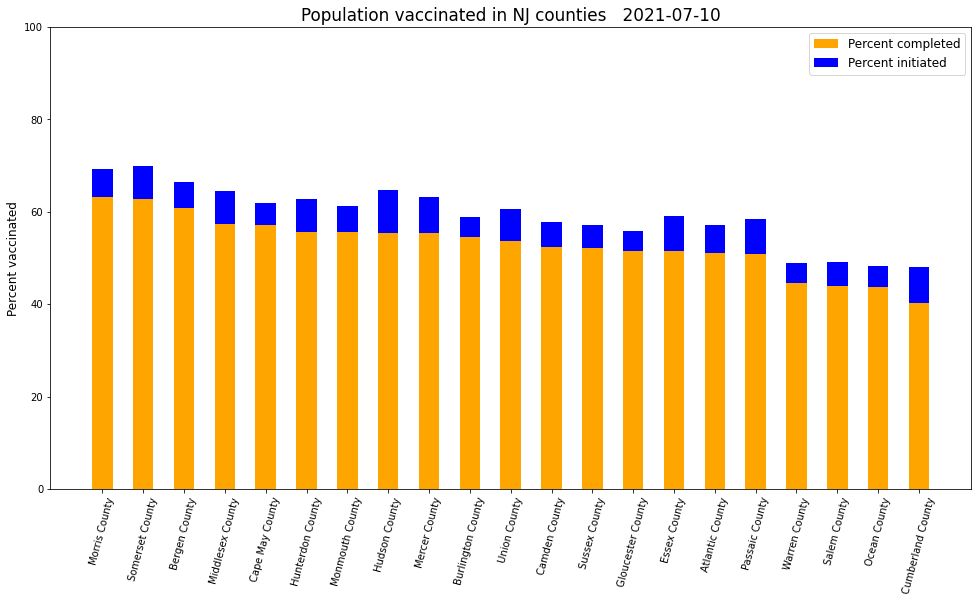

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['Percent completed','Percent initiated']
dataset = [percent_vaccine["Percent completed"],percent_vaccine["Percent initiated"]]
X_AXIS = percent_vaccine["county"]

matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 14})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16.5, 8.5)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.5


p1 = plt.bar(ind, dataset[0], width, color='orange')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='b')

plt.ylim([0,100])
plt.yticks(fontsize=10)
plt.ylabel("Percent vaccinated", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=10, rotation=75)
plt.title("Population vaccinated in NJ counties   "  + Data_date)
plt.legend((p1[0], p2[0]), (header[0], header[1]), fontsize=12)
plt.show()

